In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
root_folder = "./"
file_name = "final_merged_df_sw500.csv"

train_losses_beta = {}
train_accuracies_beta = {}
val_losses_beta = {}
val_accuracies_beta = {}
test_accuracies_beta = {}
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9]):
    print(f"Training for beta={beta}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs, beta=beta)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_beta[i] = train_losses
    train_accuracies_beta[i] = train_accuracies
    val_losses_beta[i] = val_losses
    val_accuracies_beta[i] = val_accuracies

    test_accuracies_beta[i] = evaluate_model(model, test_loader)

out_file_name = 'exp2_beta_06_09_bs_128_ep_10_T_100.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_beta, "train_accuracies": train_accuracies_beta, "val_losses": val_losses_beta, "val_accuracies": val_accuracies_beta, "test_accuracies": test_accuracies_beta}, f)


Training for beta=0.6
Epoch 1/10, Train Loss: 2.2484, Train Accuracy: 25.64%, Val Loss: 2.0386, Val Accuracy: 30.40%, Time: 87.55s
Epoch 2/10, Train Loss: 1.9853, Train Accuracy: 31.86%, Val Loss: 1.9713, Val Accuracy: 31.55%, Time: 89.94s
Epoch 3/10, Train Loss: 1.9223, Train Accuracy: 32.45%, Val Loss: 1.9651, Val Accuracy: 33.16%, Time: 93.76s
Epoch 4/10, Train Loss: 1.8884, Train Accuracy: 33.18%, Val Loss: 1.9275, Val Accuracy: 31.65%, Time: 94.00s
Epoch 5/10, Train Loss: 1.8752, Train Accuracy: 33.47%, Val Loss: 1.8548, Val Accuracy: 33.35%, Time: 91.71s
Epoch 6/10, Train Loss: 1.8535, Train Accuracy: 33.71%, Val Loss: 1.8211, Val Accuracy: 33.43%, Time: 92.15s
Epoch 7/10, Train Loss: 1.8314, Train Accuracy: 34.14%, Val Loss: 1.9208, Val Accuracy: 33.20%, Time: 92.14s
Epoch 8/10, Train Loss: 1.8143, Train Accuracy: 34.40%, Val Loss: 1.8517, Val Accuracy: 33.73%, Time: 91.59s
Epoch 9/10, Train Loss: 1.8025, Train Accuracy: 34.51%, Val Loss: 1.8570, Val Accuracy: 34.55%, Time: 91.3

In [2]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"

train_losses_beta = {}
train_accuracies_beta = {}
val_losses_beta = {}
val_accuracies_beta = {}
test_accuracies_beta = {}
for i, beta in enumerate([0.99, 0.999, 1]):
    print(f"Training for beta={beta}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs, beta=beta)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_beta[i] = train_losses
    train_accuracies_beta[i] = train_accuracies
    val_losses_beta[i] = val_losses
    val_accuracies_beta[i] = val_accuracies

    test_accuracies_beta[i] = evaluate_model(model, test_loader)

out_file_name = 'exp2_beta_099_1_bs_128_ep_10_T_100.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_beta, "train_accuracies": train_accuracies_beta, "val_losses": val_losses_beta, "val_accuracies": val_accuracies_beta, "test_accuracies": test_accuracies_beta}, f)


Training for beta=0.99
Epoch 1/10, Train Loss: 2.1042, Train Accuracy: 27.19%, Val Loss: 1.7120, Val Accuracy: 33.80%, Time: 37.37s
Epoch 2/10, Train Loss: 1.6479, Train Accuracy: 37.01%, Val Loss: 1.5970, Val Accuracy: 37.26%, Time: 37.10s
Epoch 3/10, Train Loss: 1.5938, Train Accuracy: 38.61%, Val Loss: 1.5653, Val Accuracy: 39.86%, Time: 34.78s
Epoch 4/10, Train Loss: 1.5634, Train Accuracy: 39.57%, Val Loss: 1.5779, Val Accuracy: 38.96%, Time: 37.78s
Epoch 5/10, Train Loss: 1.5459, Train Accuracy: 39.95%, Val Loss: 1.5215, Val Accuracy: 40.41%, Time: 38.88s
Epoch 6/10, Train Loss: 1.5339, Train Accuracy: 40.64%, Val Loss: 1.5365, Val Accuracy: 39.81%, Time: 38.86s
Epoch 7/10, Train Loss: 1.5282, Train Accuracy: 40.86%, Val Loss: 1.5236, Val Accuracy: 42.05%, Time: 38.43s
Epoch 8/10, Train Loss: 1.5166, Train Accuracy: 41.34%, Val Loss: 1.5062, Val Accuracy: 41.03%, Time: 39.26s
Epoch 9/10, Train Loss: 1.5046, Train Accuracy: 41.89%, Val Loss: 1.5057, Val Accuracy: 41.49%, Time: 38.

In [11]:
with open('exp2_beta_06_09_bs_128_ep_10_T_100.pkl', 'rb') as f:
    data = pickle.load(f)

with open('exp2_beta_099_1_bs_128_ep_10_T_100.pkl', 'rb') as f:
    data2 = pickle.load(f)

beta = [0.99, 0.999, 1]
train_losses = {}
train_accuracies = {}
val_losses = {}
val_accuracies = {}
test_accuracies = {}
for i, b in enumerate(beta):
    train_losses[b] = data2['train_losses'].pop(i)
    train_accuracies[b] = data2['train_accuracies'].pop(i)
    val_losses[b] = data2['val_losses'].pop(i)
    val_accuracies[b] = data2['val_accuracies'].pop(i)
    test_accuracies[b] = data2['test_accuracies'].pop(i)

beta = [0.6, 0.7, 0.8, 0.9]
for i, b in enumerate(beta):
    train_losses[b] = data['train_losses'].pop(i)
    train_accuracies[b] = data['train_accuracies'].pop(i)
    val_losses[b] = data['val_losses'].pop(i)
    val_accuracies[b] = data['val_accuracies'].pop(i)
    test_accuracies[b] = data['test_accuracies'].pop(i)


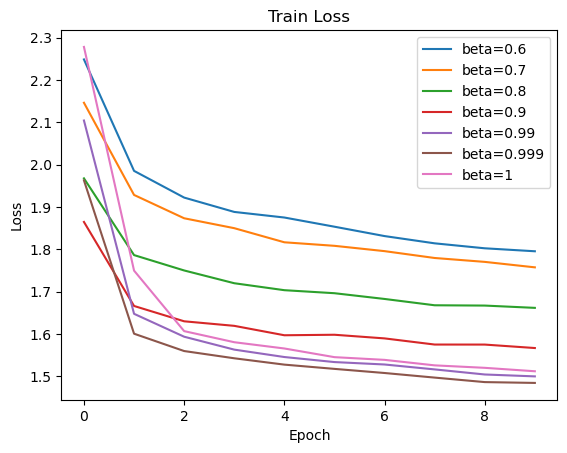

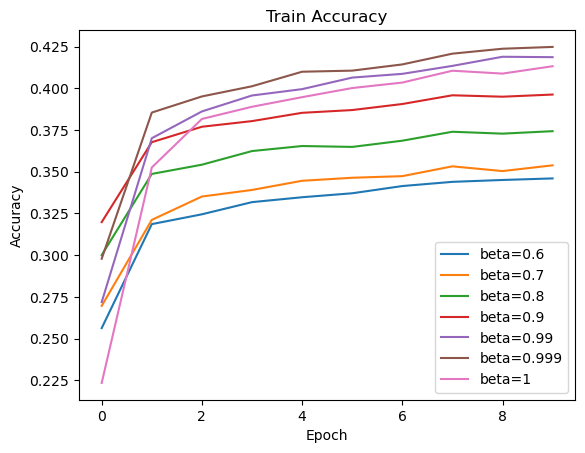

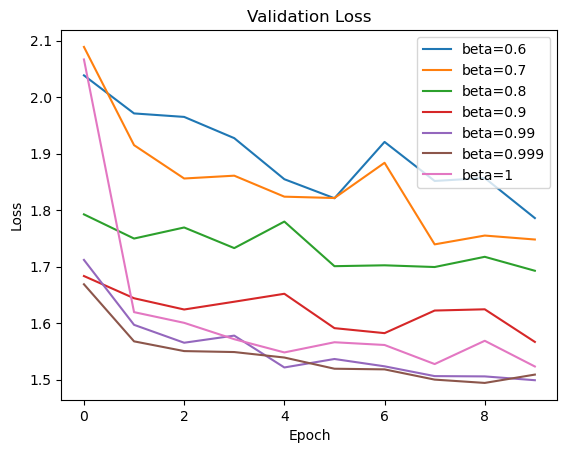

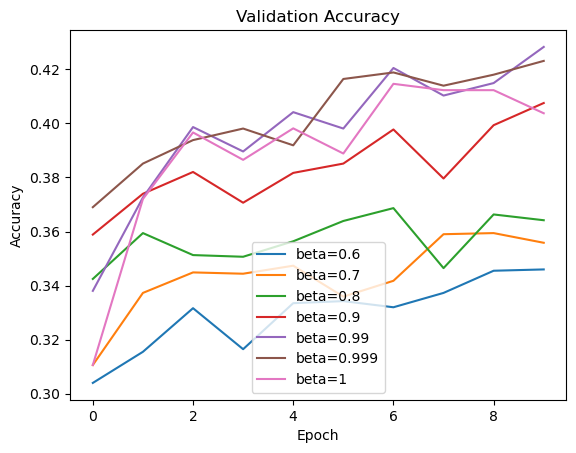

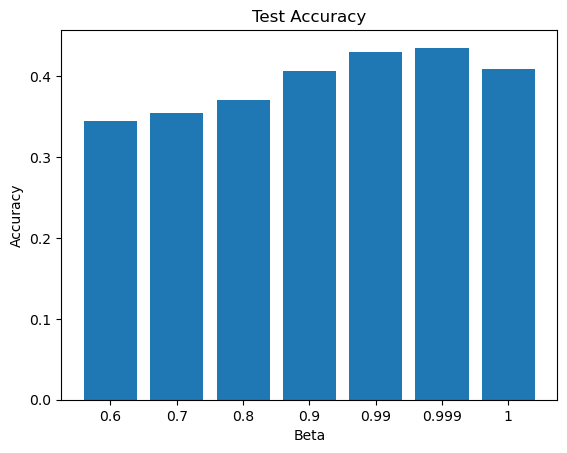

In [14]:
# Plotting
beta = [0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]

plt.figure()
for b in beta:
    plt.plot(train_losses[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Train Loss")

plt.figure()
for b in beta:
    plt.plot(train_accuracies[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Train Accuracy")

plt.figure()
for b in beta:
    plt.plot(val_losses[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Validation Loss")

plt.figure()
for b in beta:
    plt.plot(val_accuracies[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Validation Accuracy")

plt.figure()
plt.bar([str(b) for b in beta], [test_accuracies[b] for b in beta])
plt.xlabel("Beta")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")

plt.show()